# Word2Vec Tutorial with Gensim

In [1]:
!pip install gensim

In [3]:
# imports

import json
from collections import Counter
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import utils

%matplotlib inline

In [4]:
# Load and display data

with open('data/countries.json', 'r') as fout:
    countries = json.load(fout)

In [5]:
countries['India'][:20]

['India',
 'Hindi',
 'Bhārat',
 'officially',
 'the',
 'Republic',
 'of',
 'India',
 'Hindi',
 'Bhārat',
 'Gaṇarājya',
 'is',
 'a',
 'country',
 'in',
 'South',
 'Asia',
 'It',
 'is',
 'the']

In [6]:
print(' '.join(countries['India'])[:512] + ' ...')

India Hindi Bhārat officially the Republic of India Hindi Bhārat Gaṇarājya is a country in South Asia It is the second most populous country the seventh largest country by land area and the most populous democracy in the world Bounded by the Indian Ocean on the south the Arabian Sea on the southwest and the Bay of Bengal on the southeast it shares land borders with Pakistan to the west China Nepal and Bhutan to the north and Bangladesh and Myanmar to the east In the Indian Ocean India is in the vicinity of  ...


In [7]:
for i, (country, text) in enumerate(countries.items()):
    print(country)
    print(' '.join(text)[:512] + ' ...')
    print('-' * 100)
    if i >= 5:
        break

Abkhazia
Abkhazia listen or is a partially recognized state in the South Caucasus recognised by most countries as part of Georgia which views the region as an autonomous republic It lies on the eastern coast of the Black Sea south of the Greater Caucasus mountains in northwestern Georgia It covers 8 665 square kilometres 3 346 sq mi and has a population of around 245 000 Its capital is Sukhumi The status of Abkhazia is a central issue of the Georgian Abkhazian conflict and Georgia Russia relations The polity is reco ...
----------------------------------------------------------------------------------------------------
Afghanistan
Afghanistan listen Pashto Dari افغانستان Pashto Afġānistān pashto avɣɒnisˈtɒn ab Dari Afġānestān avɣɒnesˈtɒn officially the Islamic Republic of Afghanistan is a landlocked country at the crossroads of Central and South Asia Afghanistan is bordered by Pakistan to the east and south Iran to the west Turkmenistan Uzbekistan and Tajikistan to the north and China 

## Basic Word2Vec Usage

In [8]:
# Create and train a simple model

model = Word2Vec(sentences=countries.values())

In [9]:
# Check word similarities learnt by the model

model.wv.most_similar('India', topn=5)

[('China', 0.8318845629692078),
 ('Iran', 0.7939356565475464),
 ('Brazil', 0.762339174747467),
 ('Mexico', 0.7565432786941528),
 ('Pakistan', 0.7444307804107666)]

In [11]:
# Enable computation of loss

model = Word2Vec(
    sentences=countries.values(),
    compute_loss=True
)
model.get_latest_training_loss()

5862216.0

### Word2Vec options

In [10]:
Word2Vec?

Init signature:
Word2Vec(
    sentences=None,
    corpus_file=None,
    vector_size=100,
    alpha=0.025,
    window=5,
    min_count=5,
    max_vocab_size=None,
    sample=0.001,
    seed=1,
    workers=3,
    min_alpha=0.0001,
    sg=0,
    hs=0,
    negative=5,
    ns_exponent=0.75,
    cbow_mean=1,
    hashfxn=<built-in function hash>,
    epochs=5,
    null_word=0,
    trim_rule=None,
    sorted_vocab=1,
    batch_words=10000,
    compute_loss=False,
    callbacks=(),
    comment=None,
    max_final_vocab=None,
)
Docstring:     
Serialize/deserialize objects from disk, by equipping them with the `save()` / `load()` methods.

Warnings
--------
This uses pickle internally (among other techniques), so objects must not contain unpicklable attributes
such as lambda functions etc.
Init docstring:
Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.

Once you're finished training a model (=no more updates, only querying)
store and use only the :class:

## Heuristics for Word2vec algorithms

### Determining size of the vocabulary

In [11]:
# How many unique words in the vocabulary?

counter = Counter()
for words in countries.values():
    for word in words:
        counter.update([word])

print(len(counter))

93695


In [12]:
# Default vocabulary size of the original model

len(model.wv)

23345

Loss after epoch 0: 1601075.75
Loss after epoch 1: 1237710.0
Loss after epoch 2: 1120686.25
Loss after epoch 3: 937416.5
Loss after epoch 4: 899267.5
Loss after epoch 5: 860546.0
Loss after epoch 6: 816605.0
Loss after epoch 7: 830387.5
Loss after epoch 8: 719057.5
Loss after epoch 9: 698440.0


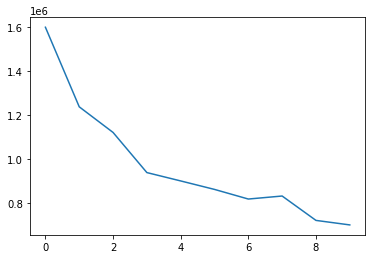

In [13]:
# Retrain - increased vocabulary size, more epochs, larger word vectors

metric = utils.MetricCallback(every=1)
model = Word2Vec(
    sentences=countries.values(),
    vector_size=128,
    epochs=10,
    max_vocab_size=65536,
    compute_loss=True,
    callbacks=[metric]
)
plt.plot(metric.myloss)

In [14]:
# Check similarities again

model.wv.most_similar('India')

[('Pakistan', 0.6798832416534424),
 ('China', 0.6517045497894287),
 ('Malaysia', 0.6187326312065125),
 ('Egypt', 0.6053561568260193),
 ('Nepal', 0.5966425538063049),
 ('Vietnam', 0.5833825469017029),
 ('Iran', 0.5817696452140808),
 ('Asia', 0.5800202488899231),
 ('Nigeria', 0.5782634615898132),
 ('Indonesia', 0.5757361650466919)]

Loss after epoch 0: 537667.0625
Loss after epoch 10: 276075.75
Loss after epoch 20: 225619.0
Loss after epoch 30: 208679.0
Loss after epoch 40: 211603.0
Loss after epoch 50: 218980.0
Loss after epoch 60: 195792.0
Loss after epoch 70: 167182.0
Loss after epoch 80: 150244.0
Loss after epoch 90: 145864.0


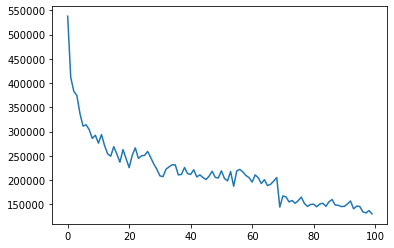

In [15]:
# Retrain - more epochs

metric = utils.MetricCallback(every=10)
model = Word2Vec(
    sentences=countries.values(),
    vector_size=128,
    epochs=100,
    max_vocab_size=65536,
    compute_loss=True,
    callbacks=[metric],
    min_alpha=0.001,
    workers=9
)
plt.plot(metric.myloss)

In [16]:
model.wv.most_similar('India')

[('Nepal', 0.6051490306854248),
 ('China', 0.6018531918525696),
 ('Pakistan', 0.5728140473365784),
 ('Indonesia', 0.5397182106971741),
 ('Bengal', 0.52110755443573),
 ('Singapore', 0.5205636620521545),
 ('Bhutan', 0.4920511245727539),
 ('Japan', 0.4807718098163605),
 ('Malaysia', 0.4776271879673004),
 ('Bangladesh', 0.4722442626953125)]

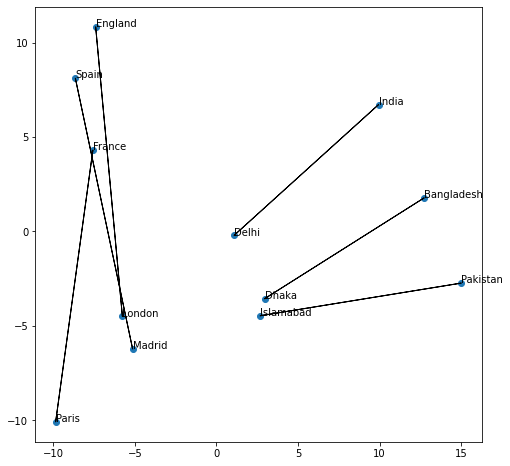

In [17]:
# Examine the vector space

X = ['India', 'Pakistan', 'Bangladesh', 'France', 'England', 'Spain']
Y = ['Delhi', 'Islamabad', 'Dhaka', 'Paris', 'London', 'Madrid']
utils.plot_arrows(X, Y, model.wv)

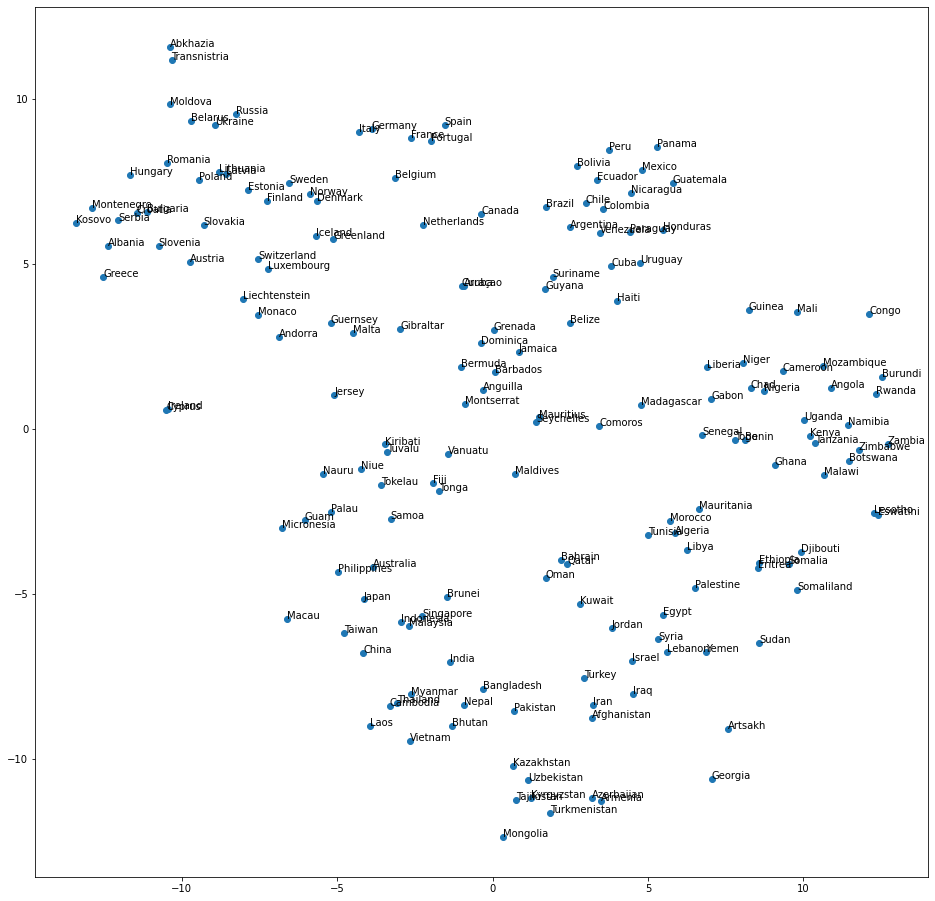

In [18]:
# Visualize vectors for all countries

utils.plot_vectors(countries, model)

## Word Analogies

In [19]:
# India: Ganges -> Brazil: __ ?

model.wv.most_similar(positive=['Ganges', 'Brazil'], negative=['India'])

[('Amazon', 0.5502235889434814),
 ('Paraná', 0.5122882127761841),
 ('river', 0.48169562220573425),
 ('Putumayo', 0.47503846883773804),
 ('Drava', 0.4731009006500244),
 ('Pastaza', 0.4539169669151306),
 ('Brahmaputra', 0.44957587122917175),
 ('lakes', 0.4278852641582489),
 ('Lempa', 0.4247601628303528),
 ('Napo', 0.4206174612045288)]

In [20]:
# America: Washington -> France: __ ?

model.wv.most_similar(positive=['Washington', 'France'], negative=['America'])

[('Paris', 0.516179621219635),
 ('Benjamin', 0.4221361577510834),
 ('Victor', 0.4189421832561493),
 ('Vichy', 0.39431068301200867),
 ('UK', 0.3861696124076843),
 ('Turin', 0.3787120580673218),
 ('Anjou', 0.3695412278175354),
 ('IV', 0.36678293347358704),
 ('Mussolini', 0.3643847405910492),
 ('arbitration', 0.3597540557384491)]

In [23]:
# India: Hindi -> Germany: __ ?

model.wv.most_similar(positive=['Hindi', 'Germany'], negative=['India'])

[('German', 0.44351640343666077),
 ('Rzeczpospolita', 0.4081052839756012),
 ('Polska', 0.40679535269737244),
 ('Yiddish', 0.397907555103302),
 ('Georg', 0.39153608679771423),
 ('Austrians', 0.3894732892513275),
 ('physicists', 0.385068416595459),
 ('abbreviated', 0.367196649312973),
 ('lager', 0.3629636764526367),
 ('Music', 0.3621675670146942)]

In [28]:
# Save the model

model.save('wiki-countries.w2v')

In [29]:
from gensim.models import KeyedVectors
model = KeyedVectors.load('wiki-countries.w2v')

In [30]:
model